In [2]:
#假如样本失衡
#首先，分类模型天生会倾向于多数的类，让多数类更容易被判断正确，少数类被牺牲掉。
#其次，模型评估指标会失去意义。

#class_weight
#{"标签的值1"：权重1，"标签的值2"：权重2}的字典
#来输入真实的样本标签比例，来让算法意识到样本是不平衡的。
#或者使用”balanced“模式，直接使用 n_samples/(n_classes * np.bincount(y))作为权重，
#可以比较好地修正我们的样本不均衡情况
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

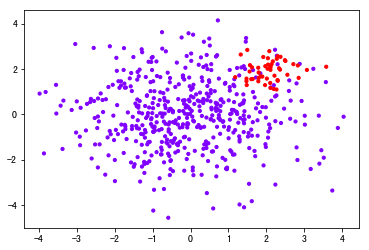

In [2]:
n1 = 500
n2 = 50
center = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[n1,n2],
                centers=center,
                cluster_std=clusters_std,
                random_state=0,
                shuffle=False)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)

In [3]:
clf = SVC(kernel='linear',C=1.0)
clf.fit(X,y)

wclf = SVC(kernel='linear',class_weight={1:10})
wclf = wclf.fit(X,y)

clf.score(X,y)

0.9418181818181818

In [4]:
wclf.score(X,y)
#这是因 为做了样本平衡后，为了要更有效地捕捉出少数类，
#模型误伤了许多多数类样本，而多数类被分错的样本数量 > 少 数类被分类正确的样本数量，
#使得模型整体的精确性下降。

0.9127272727272727

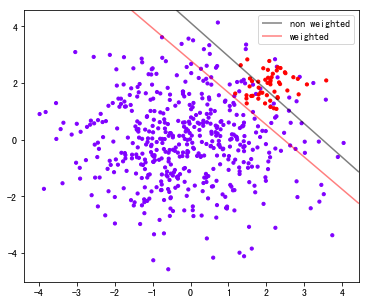

In [5]:
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])


Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])

#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

In [6]:
a.collections #调用这个等高线对象中画的所有线，返回一个惰性对象

<a list of 1 mcoll.LineCollection objects>

In [7]:
#用[*]把它打开试试看
[*a.collections] #返回了一个linecollection对象，其实就是我们等高线里所有的线的列表

In [8]:
#现在我们只有一条线，所以我们可以使用索引0来锁定这个对象
a.collections[0]

# ROC相关

In [9]:
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
# TP
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()

0.7142857142857143

In [10]:
(y[y == clf.predict(X)] == 0).sum()/(clf.predict(X) == 0).sum()

0.9606299212598425

In [11]:
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum() 

0.5102040816326531

In [12]:
(y[y == wclf.predict(X)] == 0).sum()/(wclf.predict(X) == 0).sum() 

1.0

F1 measure。
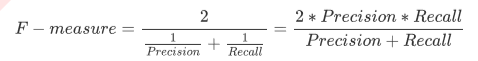

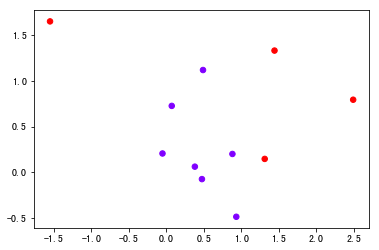

In [12]:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1,1]]
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1_, class_2_],
                  centers=centers_,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow",s=30)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression 
clf_lr = LogisticRegression().fit(X_,y_)
prob = clf_lr.predict_proba(X_)

import pandas as pd
prob = pd.DataFrame(prob)
prob.columns = ['0','1']
prob

/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261
5,0.562775,0.437225
6,0.662054,0.337946
7,0.355167,0.644833
8,0.381606,0.618394
9,0.585284,0.414716


In [14]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.5:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0
prob["y_true"] = y_
 
prob = prob.sort_values(by="1",ascending=False)
 
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,0.0,1
5,0.562775,0.437225,0.0,0
9,0.585284,0.414716,0.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [20]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [11]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [15]:
confusion_matrix(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
#confusion_matrix(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[2, 2],
       [1, 6]])

In [16]:
precision_score(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.6666666666666666

In [17]:
recall_score(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

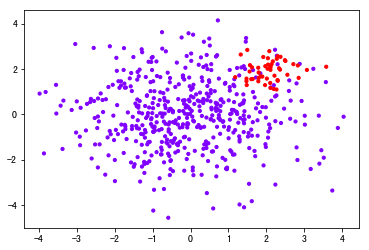

In [10]:
#接口decision_function返回的值也因此被我们认为是SVM 中的置信度（conﬁdence）。
n1 = 500
n2 = 50
center = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[n1,n2],
                centers=center,
                cluster_std=clusters_std,
                random_state=0,
                shuffle=False)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)
clf_prob = SVC(kernel='linear',C=1.0,probability=True).fit(X,y)
clf_prob.predict_proba(X)# 550，2`
clf_prob.decision_function(X)# 550
#他的正负号是样本与分割线之间的距离，以此作为判断正负标签的依据



# 绘制ROC曲线

In [22]:
cm = confusion_matrix(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0])
cm

array([[4, 0],
       [2, 5]])

In [21]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,1.0,1
5,0.562775,0.437225,1.0,0
9,0.585284,0.414716,1.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [24]:
cm[1,0]/cm[1,:].sum()#FPR

0.2857142857142857

In [27]:
cm[0,0]/cm[0,:].sum()#recall

1.0

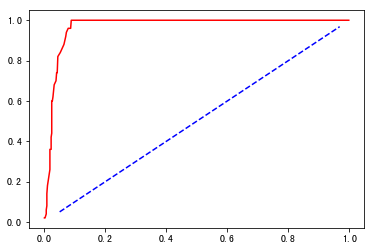

In [31]:
recall = []
FPR = []

probrange = np.linspace(clf_prob.predict_proba(X)[:,1].min(),
                        clf_prob.predict_proba(X)[:,1].max(),
                       num=50,
                       endpoint=False)

for i in probrange:
    y_pre = []
    for j in range(X.shape[0]):
        if clf_prob.predict_proba(X)[j,1] > i:
            y_pre.append(1)
        else:
            y_pre.append(0)
    cm = confusion_matrix(y,y_pre,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
    
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c='r')
plt.plot(probrange+0.05,probrange+0.05,c='b',linestyle='--')
plt.show()

In [34]:
from sklearn.metrics import roc_curve,roc_auc_score
FPR,recall,thresholds = roc_curve(y,clf_prob.decision_function(X),pos_label=1)

FPR
recall
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

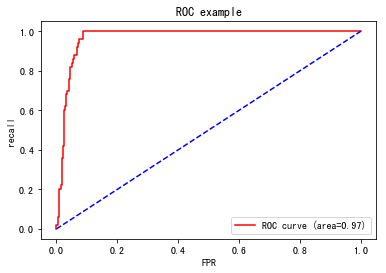

In [42]:
area = roc_auc_score(y,clf_prob.decision_function(X))
plt.figure()
plt.plot(FPR,recall,color='r',label='ROC curve (area=%.2f)'%area)
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('recall')
plt.title('ROC example')
plt.legend(loc='lower right')
plt.show()